# NAME: ISHANT JAIN

## Task 6 - Prediction using Decision Tree Algorithm

## Task Description

### Creating a decision tree classifier for the iris dataset and visualizing the classified data.

#### Importing the necessary libraries and packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree,datasets

#### load the data

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target']=iris.target
df['species'] = df['target'].map({0:iris.target_names[0],1:iris.target_names[1],2:iris.target_names[2]})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


#### head of data 

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


#### info of data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   species            150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


#### checking if target feature labels are unique

In [5]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [6]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

#### Visualizing iris data using pairplot

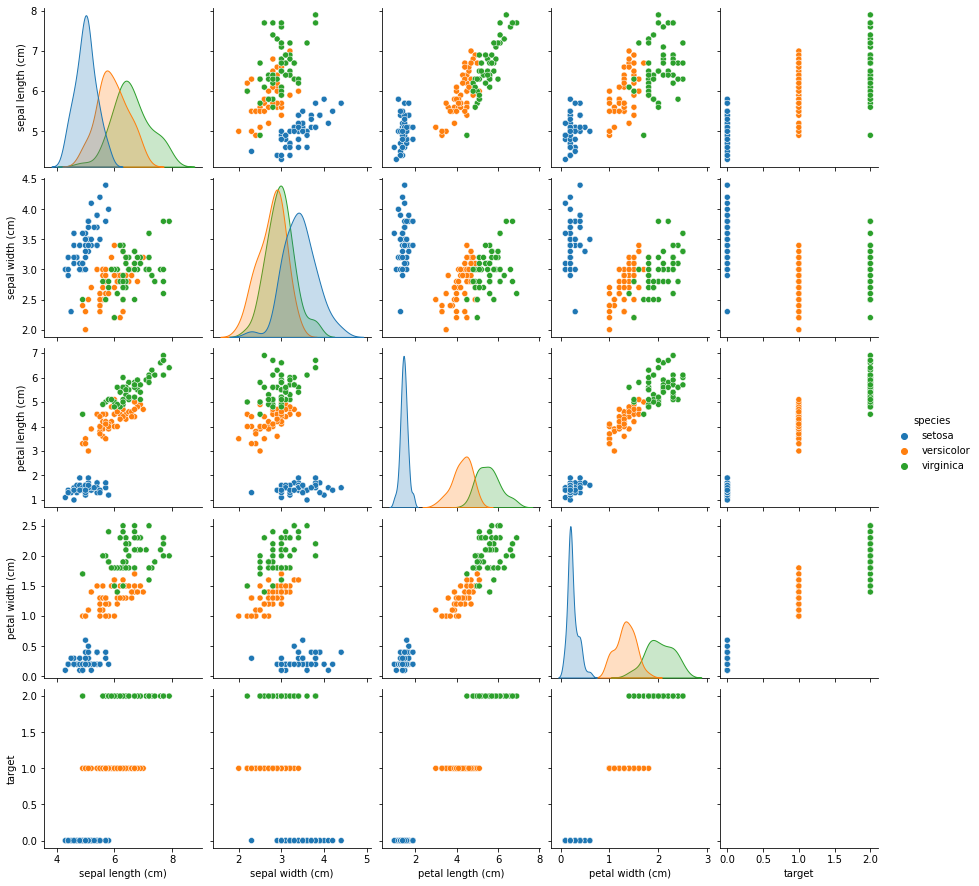

In [7]:
sns.pairplot(data=df,hue='species')

#### Creating box plot for target feature and sepalLength

<AxesSubplot:xlabel='species', ylabel='sepal length (cm)'>

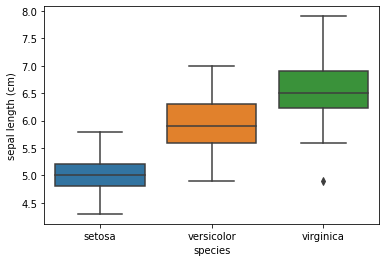

In [8]:
sns.boxplot(x="species", y="sepal length (cm)", data=df)

C:\Users\ishan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


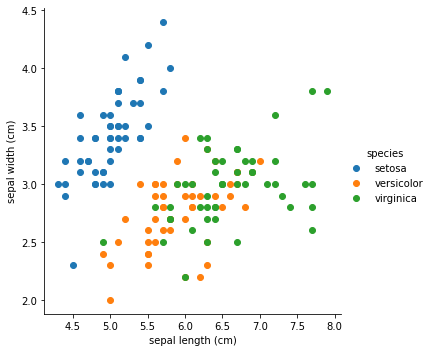

In [9]:
sns.FacetGrid(df, hue="species", size=5) \
   .map(plt.scatter, "sepal length (cm)", "sepal width (cm)") \
   .add_legend()

#### Decision Tree classification

In [10]:
x = df.loc[:,iris.feature_names].values

In [11]:
y = df.loc[:,'target'].values

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
clf = tree.DecisionTreeClassifier()

In [14]:
clf = clf.fit(x,y)

#### Visualizing decision tree

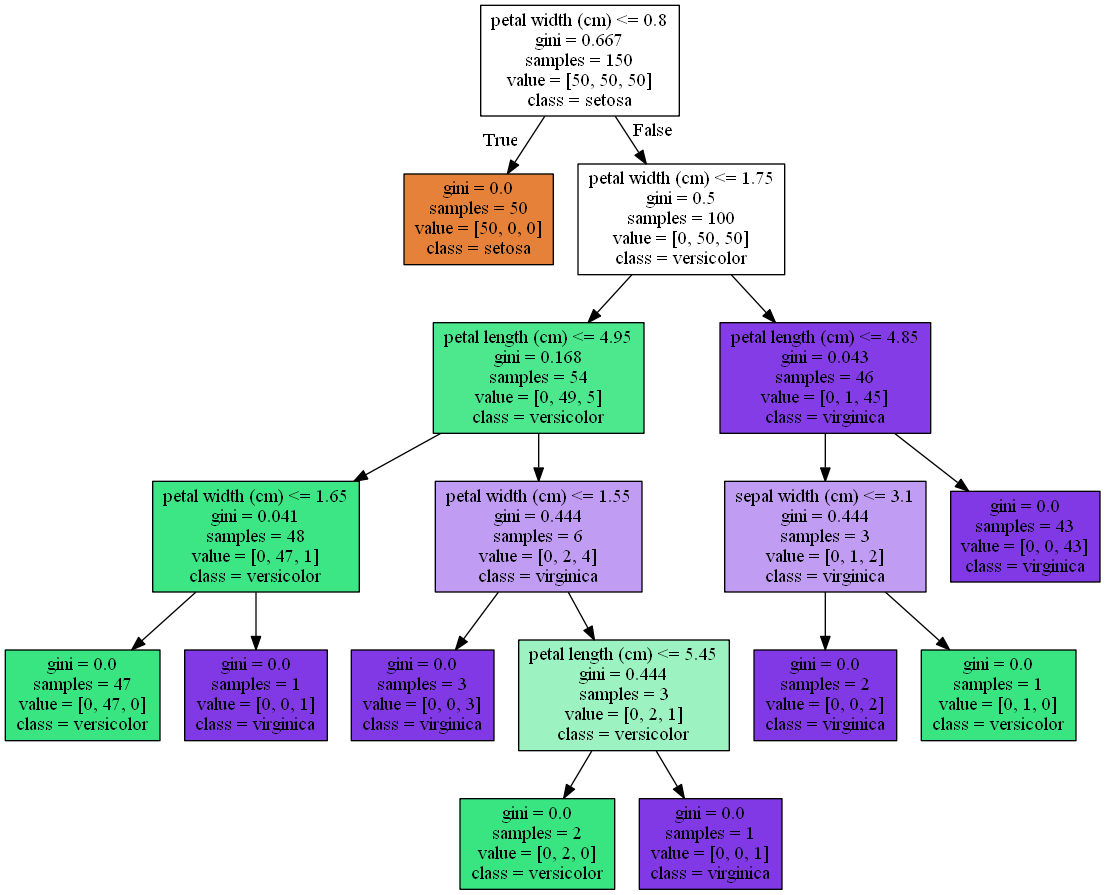

In [15]:
from IPython.display import Image
import six
import sys
import pydotplus
sys.modules['sklearn.externals.six'] = six

dot_data = six.StringIO()
tree.export_graphviz(clf, out_file=dot_data,
                          feature_names=iris.feature_names,class_names=iris.target_names,filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#### Train model

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

####  Here i have used a function called get_acc where parameters are max no of leaf nodes .training and testing data

In [17]:
def get_acc(max_leaf_nodes,X_train,X_test,Y_train,Y_test):
    model = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes,random_state=0)
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    from sklearn.metrics import accuracy_score 
    ascore=accuracy_score(Y_test,y_pred)
    return ascore

In [18]:
for max_leaf_nodes in [6,20,30,50,100]:
    my_acc = get_acc(max_leaf_nodes,X_train,X_test,Y_train,Y_test)

In [19]:
print("Max leaf nodes:{},Accuracy score: {}".format(max_leaf_nodes,my_acc))

Max leaf nodes:100,Accuracy score: 1.0


#### Making predictions

In [20]:
y_pred = clf.predict(X_test)
comparison = pd.DataFrame({'Actual':Y_test,'Predicted':y_pred})

In [21]:
comparison

,Actual,Predicted
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0
5,2,2
6,0,0
7,1,1
8,1,1
9,1,1


#### Evaluating model

In [22]:
from sklearn.metrics import r2_score

r2 = np.sqrt(r2_score(Y_test,y_pred))

print("R-squared score:",r2)

R-squared score: 1.0


In [23]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(Y_test,y_pred,squared=False))

print("RMSE value: ",rmse)

RMSE value:  0.0


In [24]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



##### Hence by this I conclude my task 6 presention where we determined the right class for the data by classifying the feature data and finetuned the model with XGBoost Algorithm.Then we visualized the classification and evaluated the model with various metrics and visualized the feature data using seaborn plots. Thank You!